# Proyek Casptone Klasifikasi Diabetes: DiaMate





In [5]:
import kagglehub
alexteboul_diabetes_health_indicators_dataset_path = kagglehub.dataset_download('alexteboul/diabetes-health-indicators-dataset')

print('Data source import complete.')


Data source import complete.


## Import Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

## Data Preparation

### Data Loading

In [7]:
# Membuat DataFrame dari file CSV dengan variabel 'data'
data = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [8]:
# Menampilkan 5 data teratas
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


### Data Preparation

In [9]:
# Menampilkan informasi tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [10]:
# Melakukan penggantian tipe data pada setiap kolom
data['Age']=data['Age'].astype('int64')
data['Education']=data['Education'].astype('int64')
data['Income']=data['Income'].astype('int64')
data['BMI']=data['BMI'].astype('int64')
data['CholCheck']=data['CholCheck'].astype('int64')
data['Smoker']=data['Smoker'].astype('int64')
data['Stroke']=data['Stroke'].astype('int64')
data['HeartDiseaseorAttack']=data['HeartDiseaseorAttack'].astype('int64')
data['PhysActivity']=data['PhysActivity'].astype('int64')
data['Fruits']=data['Fruits'].astype('int64')
data['Veggies']=data['Veggies'].astype('int64')
data['HvyAlcoholConsump']=data['HvyAlcoholConsump'].astype('int64')
data['AnyHealthcare']=data['AnyHealthcare'].astype('int64')
data['NoDocbcCost']=data['NoDocbcCost'].astype('int64')
data['GenHlth']=data['GenHlth'].astype('int64')
data['MentHlth']=data['MentHlth'].astype('int64')
data['PhysHlth']=data['PhysHlth'].astype('int64')
data['DiffWalk']=data['DiffWalk'].astype('int64')
data['Sex']=data['Sex'].astype('int64')
data['Diabetes_binary']=data['Diabetes_binary'].astype('int64')
data['HighBP']=data['HighBP'].astype('int64')
data['HighChol']=data['HighChol'].astype('int64')

In [11]:
# Menampilkan deskripsi statistik dari DataFrame
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


### Data Cleaning

In [12]:
# Melihat jumlah data yang hilang pada setiap kolom
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [13]:
# Melihat jumlah data duplikat
data.duplicated().sum()

np.int64(1635)

In [14]:
# Menghapus data duplikat
data.drop_duplicates(inplace=True)

In [15]:
# Melihat jumlah data dan kolom
data.shape

(69057, 22)

### Organize Columns

In [16]:
data = data.rename(columns={'Diabetes_binary': 'Diabetes'})

In [17]:
data=data.reindex(columns=[ 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income','Diabetes'])

In [18]:
data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,0,1,26,0,0,0,1,0,1,...,0,3,5,30,0,1,4,6,8,0
1,1,1,1,26,1,1,0,0,1,0,...,0,3,0,0,0,1,12,6,8,0
2,0,0,1,26,0,0,0,1,1,1,...,0,1,0,10,0,1,13,6,8,0
3,1,1,1,28,1,0,0,1,1,1,...,0,3,0,3,0,1,11,6,8,0
4,0,0,1,29,1,0,0,1,1,1,...,0,2,0,0,0,0,8,5,8,0


In [19]:
for col in data.columns:
  print(f"{col} : {data[col].value_counts()}\n")

HighBP : HighBP
1    39447
0    29610
Name: count, dtype: int64

HighChol : HighChol
1    36692
0    32365
Name: count, dtype: int64

CholCheck : CholCheck
1    67317
0     1740
Name: count, dtype: int64

BMI : BMI
27    6118
26    4801
28    4452
30    4282
24    4168
      ... 
85       1
83       1
80       1
78       1
74       1
Name: count, Length: 80, dtype: int64

Smoker : Smoker
0    35776
1    33281
Name: count, dtype: int64

Stroke : Stroke
0    64662
1     4395
Name: count, dtype: int64

HeartDiseaseorAttack : HeartDiseaseorAttack
0    58638
1    10419
Name: count, dtype: int64

PhysActivity : PhysActivity
1    48097
0    20960
Name: count, dtype: int64

Fruits : Fruits
1    41825
0    27232
Name: count, dtype: int64

Veggies : Veggies
1    54149
0    14908
Name: count, dtype: int64

HvyAlcoholConsump : HvyAlcoholConsump
0    66052
1     3005
Name: count, dtype: int64

AnyHealthcare : AnyHealthcare
1    65874
0     3183
Name: count, dtype: int64

NoDocbcCost : NoDocbcCost
0

**EDA**

In [20]:
data_male = data[(data['Sex'] == 1)&(data['Diabetes'] == 1)]
data_male.count()

HighBP                  16752
HighChol                16752
CholCheck               16752
BMI                     16752
Smoker                  16752
Stroke                  16752
HeartDiseaseorAttack    16752
PhysActivity            16752
Fruits                  16752
Veggies                 16752
HvyAlcoholConsump       16752
AnyHealthcare           16752
NoDocbcCost             16752
GenHlth                 16752
MentHlth                16752
PhysHlth                16752
DiffWalk                16752
Sex                     16752
Age                     16752
Education               16752
Income                  16752
Diabetes                16752
dtype: int64

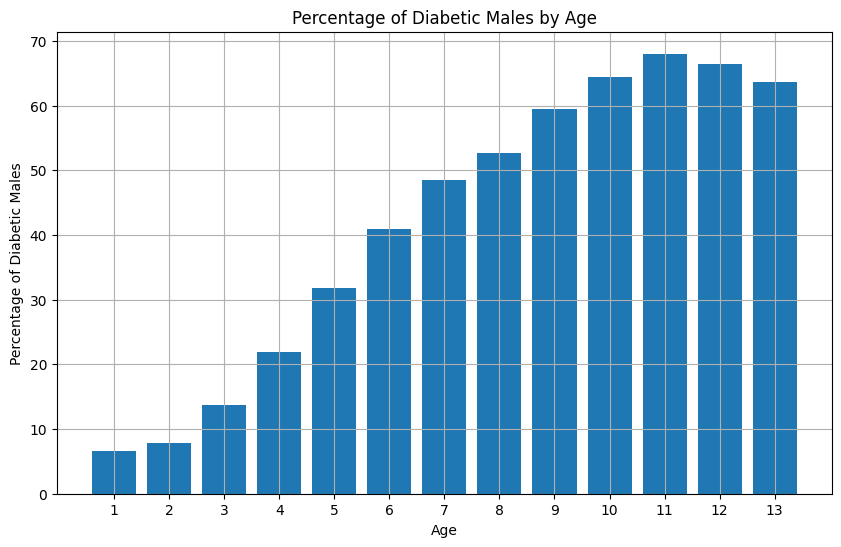

Maximum percentage of diabetic males is 68.04% at age 11.


In [21]:
# frequency of diabetics of all ages for male

data_male = data[data['Sex'] == 1]
male_diabetic_by_age = data_male.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(male_diabetic_by_age['Age'], male_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Age')
plt.ylabel('Percentage of Diabetic Males')
plt.title('Percentage of Diabetic Males by Age')
plt.xticks(male_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = male_diabetic_by_age.loc[male_diabetic_by_age['Diabetes'].idxmax()]
print("Maximum percentage of diabetic males is {:.2f}% at age {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))


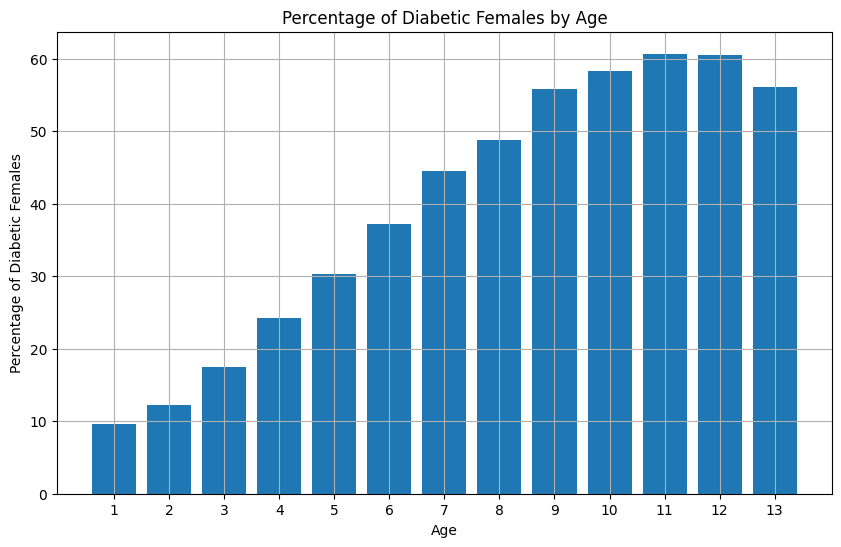

Maximum percentage of diabetic females is 60.71% at age 11.


In [22]:
# frequency of diabetics of all ages for female

data_female = data[data['Sex'] == 0]
female_diabetic_by_age = data_female.groupby('Age')['Diabetes'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(female_diabetic_by_age['Age'], female_diabetic_by_age['Diabetes'] * 100)
plt.xlabel('Age')
plt.ylabel('Percentage of Diabetic Females')
plt.title('Percentage of Diabetic Females by Age')
plt.xticks(female_diabetic_by_age['Age'])
plt.grid(True)
plt.show()

max_percent_age = female_diabetic_by_age.loc[female_diabetic_by_age['Diabetes'].idxmax()]
print("Maximum percentage of diabetic females is {:.2f}% at age {}.".format(max_percent_age['Diabetes'] * 100, int(max_percent_age['Age'])))


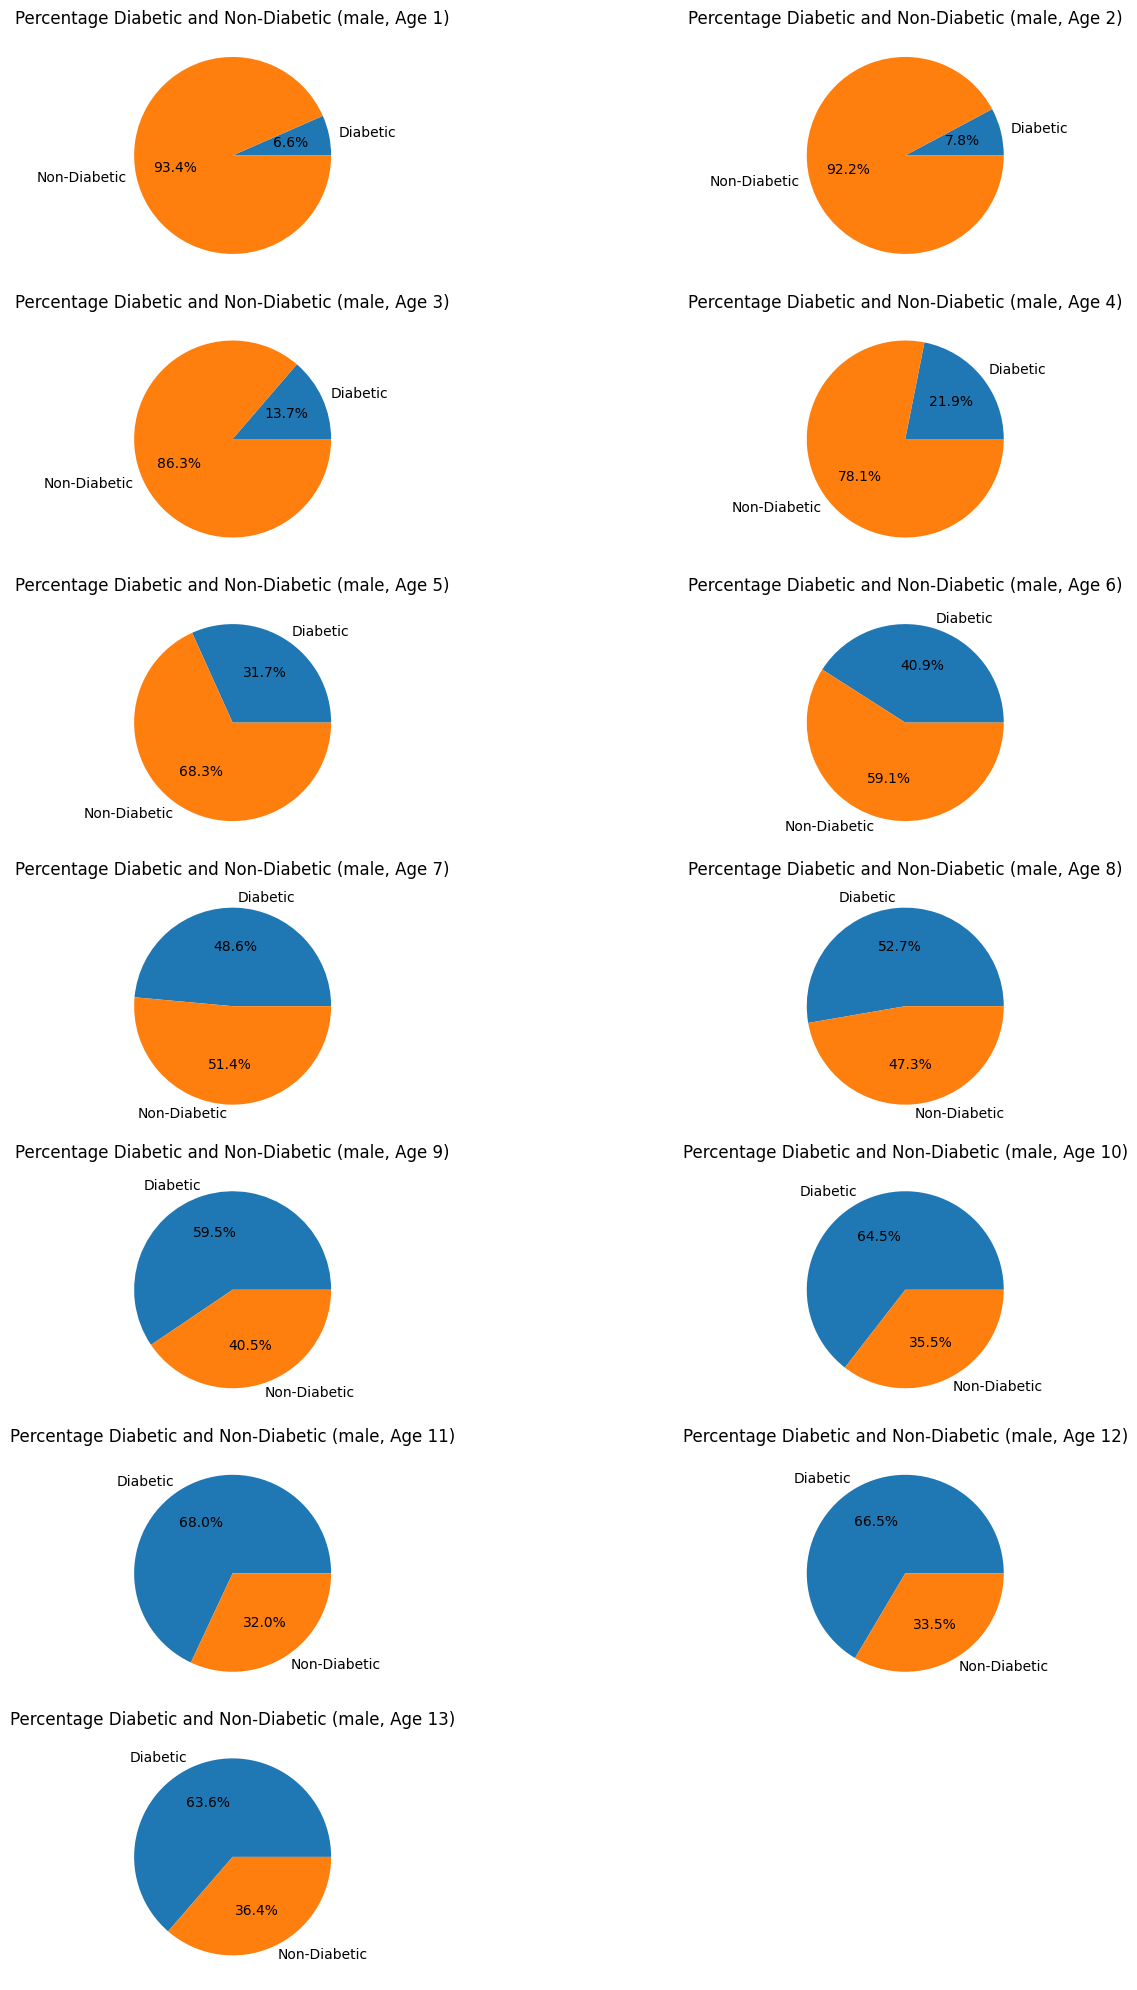

In [23]:
# percentage of diabetics and nondiabetics for male in range of all ages

plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_female = data[(data['Sex'] == 1) & (data['Age'] == age)]
    total_male = len(df_female)
    diabetic_male = len(df_female[df_female['Diabetes'] == 1])
    non_diabetic_male = len(df_female[df_female['Diabetes'] == 0])
    plt.pie([diabetic_male, non_diabetic_male], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
    plt.title(f'Percentage Diabetic and Non-Diabetic (male, Age {age})')
plt.tight_layout()
plt.show()


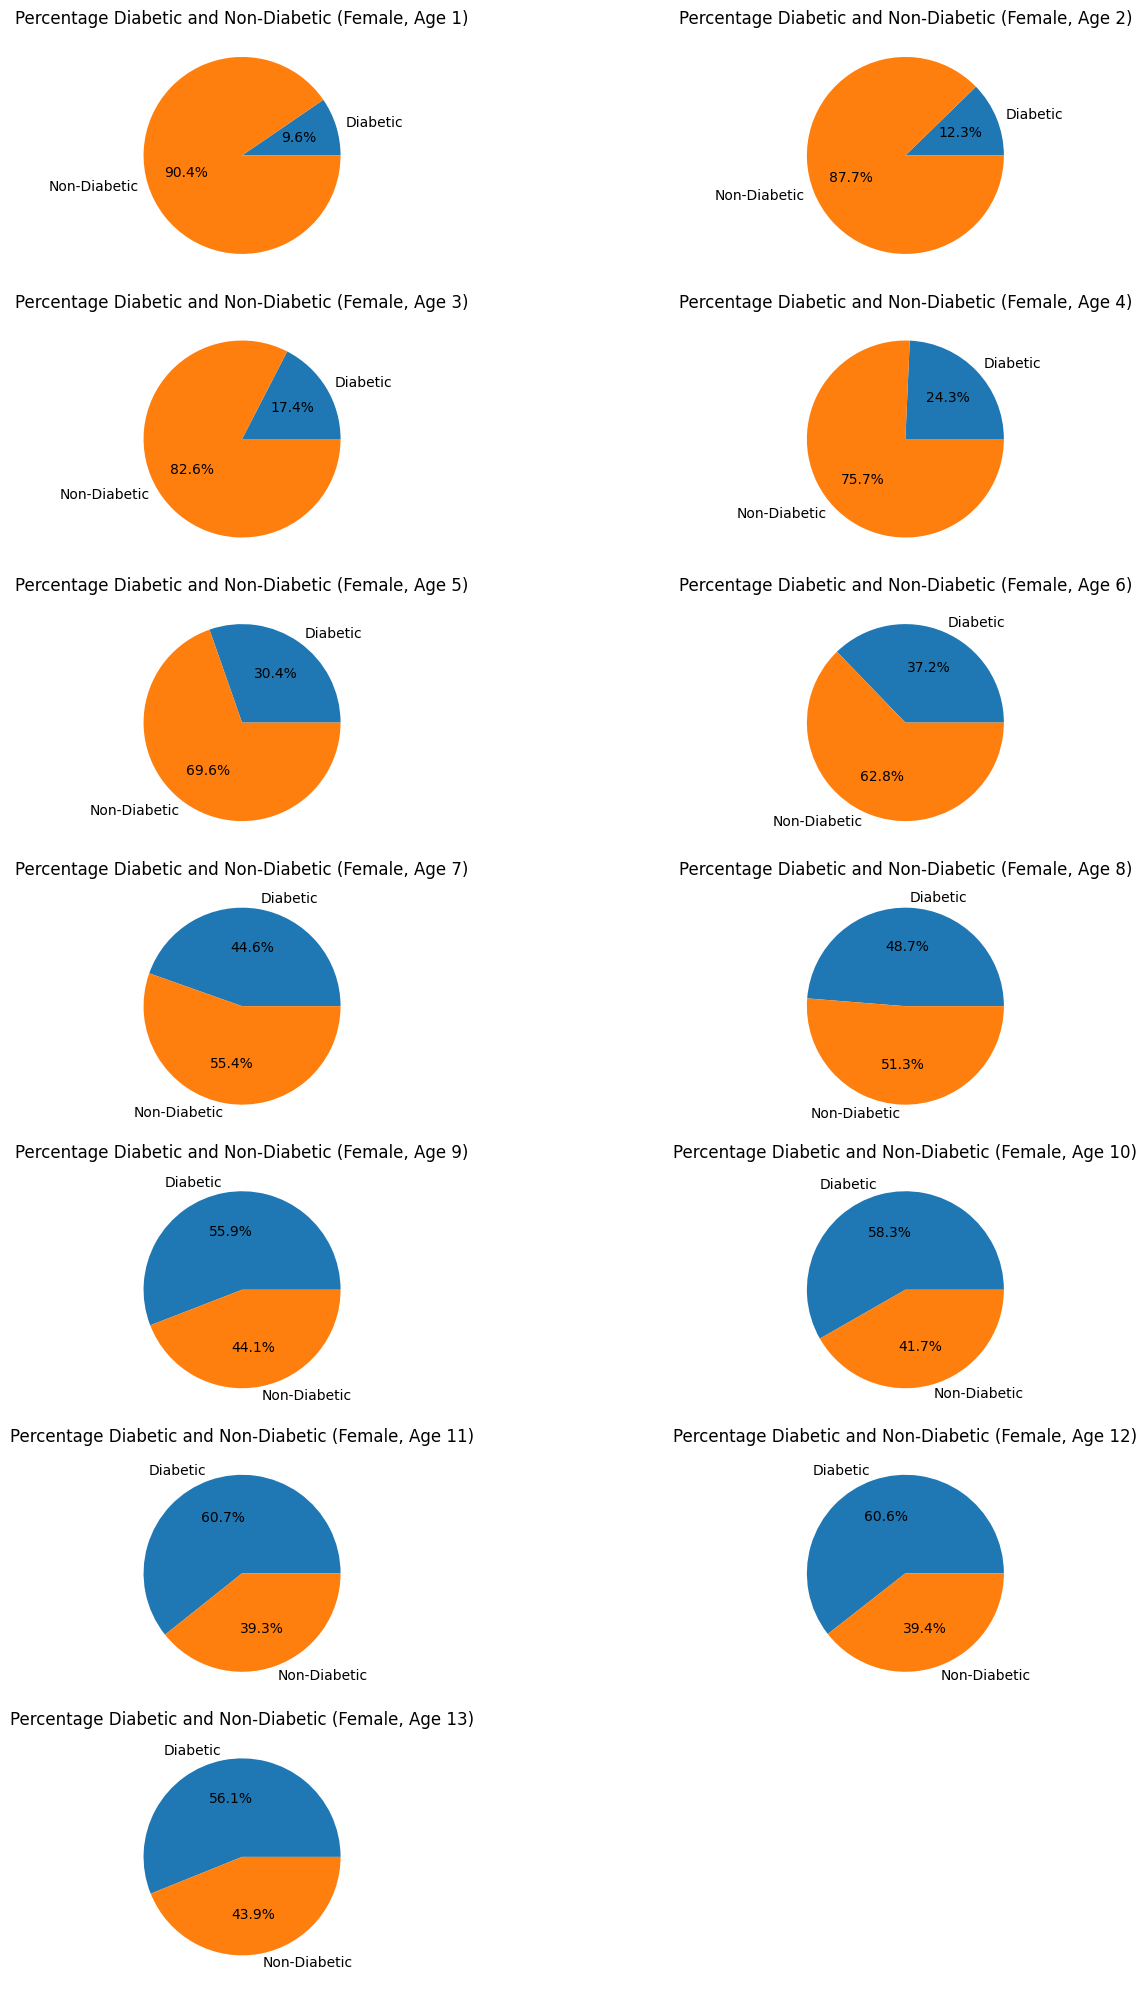

In [24]:
# percentage of diabetics and nondiabetics for female in range of all ages

plt.figure(figsize=(15, 20))
for i, age in enumerate(range(1, 14)):
    plt.subplot(7, 2, i + 1)
    df_female = data[(data['Sex'] == 0) & (data['Age'] == age)]
    total_female = len(df_female)
    diabetic_female = len(df_female[df_female['Diabetes'] == 1])
    non_diabetic_female = len(df_female[df_female['Diabetes'] == 0])
    plt.pie([diabetic_female, non_diabetic_female], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
    plt.title(f'Percentage Diabetic and Non-Diabetic (Female, Age {age})')
plt.tight_layout()
plt.show()


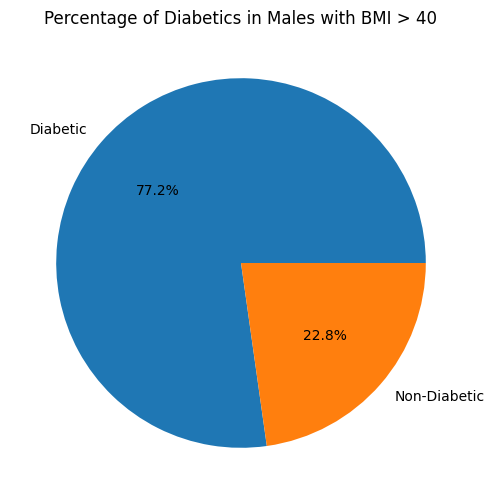

Percentage of diabetics in males with BMI > 40: 77.2%


In [25]:
# Filter data for males with BMI > 40
male_high_bmi = data[(data['Sex'] == 1) & (data['BMI'] > 40)]

# Calculate percentage of diabetics
total_male_high_bmi = len(male_high_bmi)
diabetic_male_high_bmi = len(male_high_bmi[male_high_bmi['Diabetes'] == 1])
percent_diabetic = (diabetic_male_high_bmi / total_male_high_bmi) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with BMI > 40')
plt.show()

print(f"Percentage of diabetics in males with BMI > 40: {percent_diabetic:.1f}%")


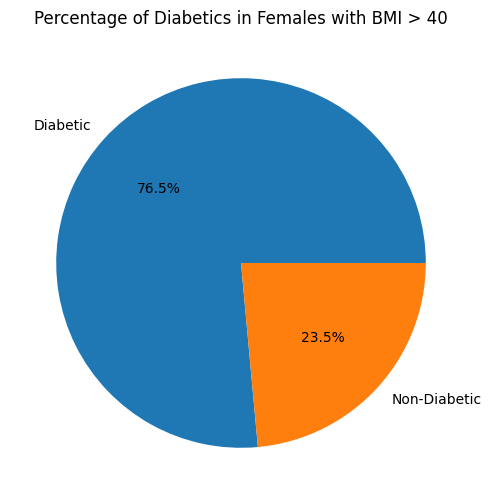

Percentage of diabetics in females with BMI > 40: 76.5%


In [26]:
# Filter data for females with BMI > 40
female_high_bmi = data[(data['Sex'] == 0) & (data['BMI'] > 40)]

# Calculate percentage of diabetics
total_female_high_bmi = len(female_high_bmi)
diabetic_female_high_bmi = len(female_high_bmi[female_high_bmi['Diabetes'] == 1])
percent_diabetic = (diabetic_female_high_bmi / total_female_high_bmi) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie([percent_diabetic, 100 - percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with BMI > 40')
plt.show()

print(f"Percentage of diabetics in females with BMI > 40: {percent_diabetic:.1f}%")


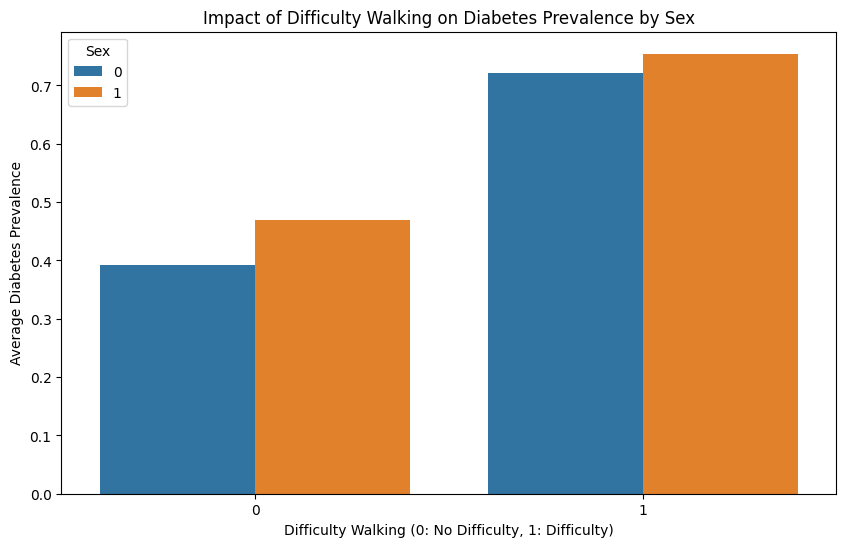

In [27]:
# Group data by Sex and DiffWalk, calculate mean Diabetes
grouped_data = data.groupby(['Sex', 'DiffWalk'])['Diabetes'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='DiffWalk', y='Diabetes', hue='Sex', data=grouped_data)
plt.xlabel('Difficulty Walking (0: No Difficulty, 1: Difficulty)')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Difficulty Walking on Diabetes Prevalence by Sex')
plt.show()


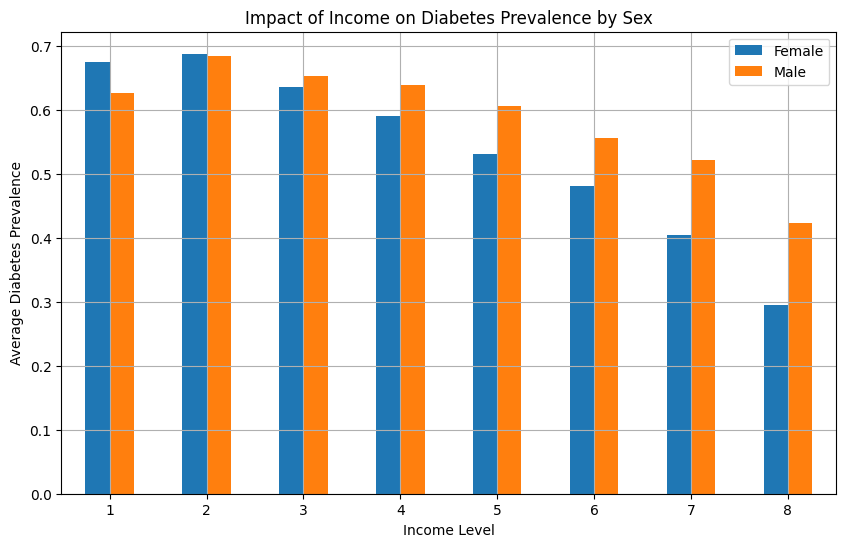

In [28]:
# the percent impact of income  in  diabetic for male and female
# Group data by income and sex, and calculate the mean diabetes prevalence
income_diabetes_by_sex = data.groupby(['Income', 'Sex'])['Diabetes'].mean().unstack()

# Plot the bar chart
income_diabetes_by_sex.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Income Level')
plt.ylabel('Average Diabetes Prevalence')
plt.title('Impact of Income on Diabetes Prevalence by Sex')
plt.xticks(rotation=0)
plt.legend(['Female', 'Male'])
plt.grid(True)
plt.show()

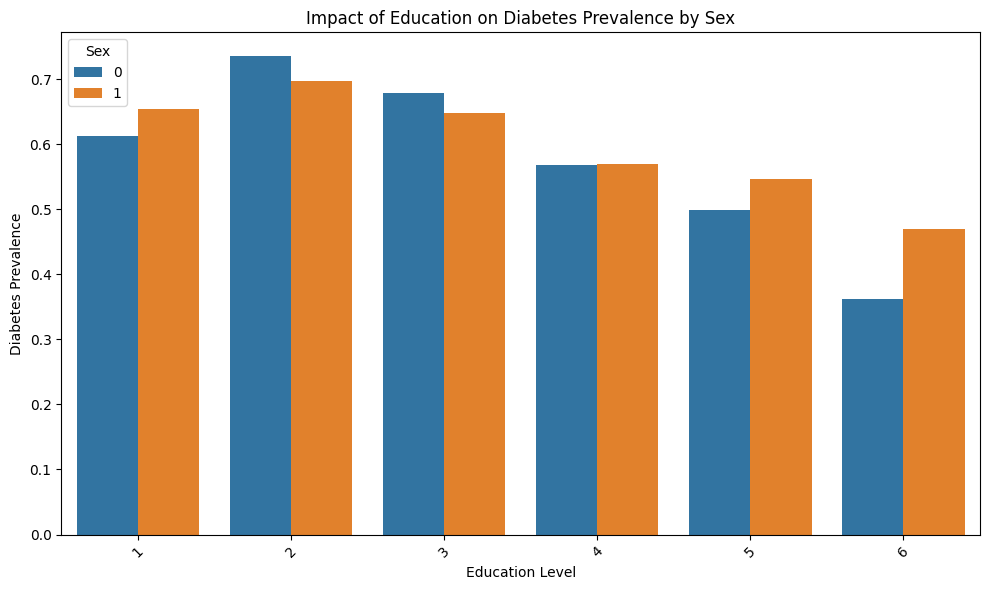

In [29]:
# the percent impact of education  in  diabetic for male and female
# Group data by education level and sex, and calculate the mean diabetes prevalence
education_diabetes = data.groupby(['Education', 'Sex'])['Diabetes'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Diabetes', hue='Sex', data=education_diabetes)
plt.xlabel('Education Level')
plt.ylabel('Diabetes Prevalence')
plt.title('Impact of Education on Diabetes Prevalence by Sex')
plt.xticks(rotation=45)
plt.legend(title='Sex', loc='upper left')
plt.tight_layout()
plt.show()


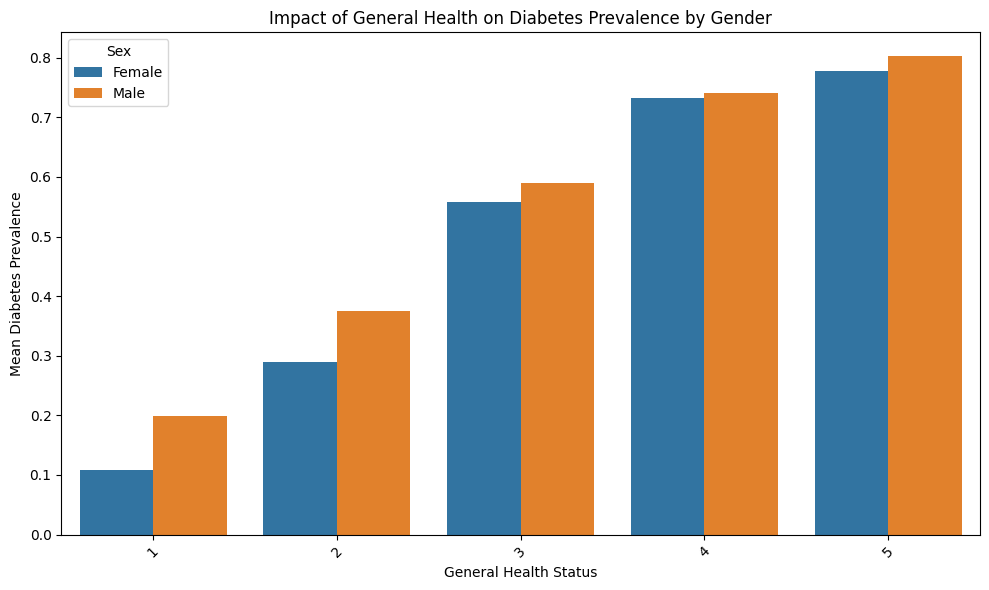

In [30]:
# the percent impact of genhlth  in  diabetic for male and female
# Group data by gender and general health, then calculate mean diabetes prevalence
grouped_data = data.groupby(['Sex', 'GenHlth'])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='GenHlth', y='Diabetes', hue='Sex', data=grouped_data)
plt.xlabel('General Health Status')
plt.ylabel('Mean Diabetes Prevalence')
plt.title('Impact of General Health on Diabetes Prevalence by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


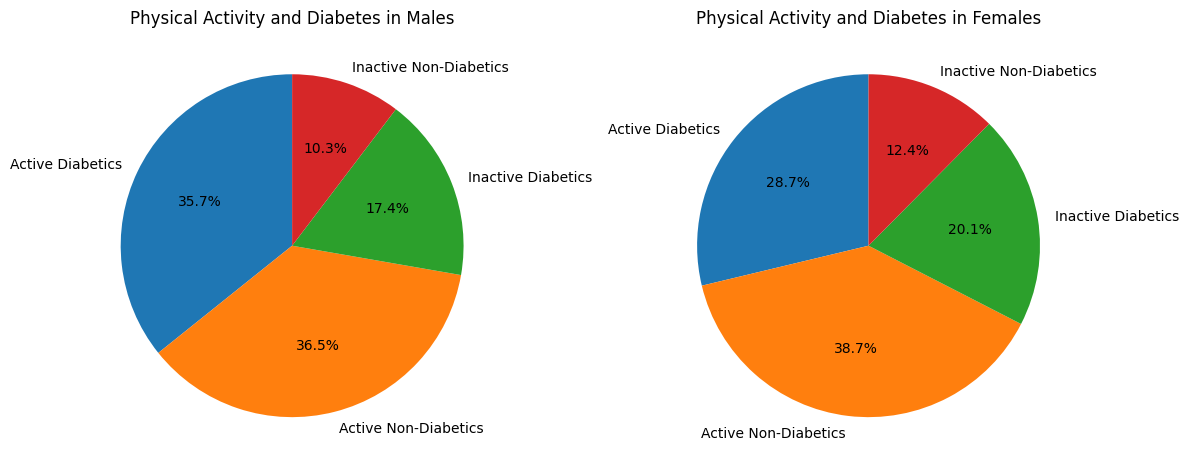

In [31]:
# the percent impact of PhysActivity  in  diabetic for male and female

male_data = data[data['Sex'] == 1]
female_data = data[data['Sex'] == 0]

# Calculate the percentage of diabetics and non-diabetics based on physical activity for males
male_active_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 1)].shape[0]
male_active_non_diabetics = male_data[(male_data['PhysActivity'] == 1) & (male_data['Diabetes'] == 0)].shape[0]
male_inactive_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 1)].shape[0]
male_inactive_non_diabetics = male_data[(male_data['PhysActivity'] == 0) & (male_data['Diabetes'] == 0)].shape[0]

# Calculate the percentage of diabetics and non-diabetics based on physical activity for females
female_active_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 1)].shape[0]
female_active_non_diabetics = female_data[(female_data['PhysActivity'] == 1) & (female_data['Diabetes'] == 0)].shape[0]
female_inactive_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 1)].shape[0]
female_inactive_non_diabetics = female_data[(female_data['PhysActivity'] == 0) & (female_data['Diabetes'] == 0)].shape[0]

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Male pie chart
axes[0].pie([male_active_diabetics, male_active_non_diabetics, male_inactive_diabetics, male_inactive_non_diabetics],
            labels=['Active Diabetics', 'Active Non-Diabetics', 'Inactive Diabetics', 'Inactive Non-Diabetics'],
            autopct='%1.1f%%', startangle=90)
axes[0].set_title('Physical Activity and Diabetes in Males')

# Female pie chart
axes[1].pie([female_active_diabetics, female_active_non_diabetics, female_inactive_diabetics, female_inactive_non_diabetics],
            labels=['Active Diabetics', 'Active Non-Diabetics', 'Inactive Diabetics', 'Inactive Non-Diabetics'],
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Physical Activity and Diabetes in Females')

plt.tight_layout()
plt.show()


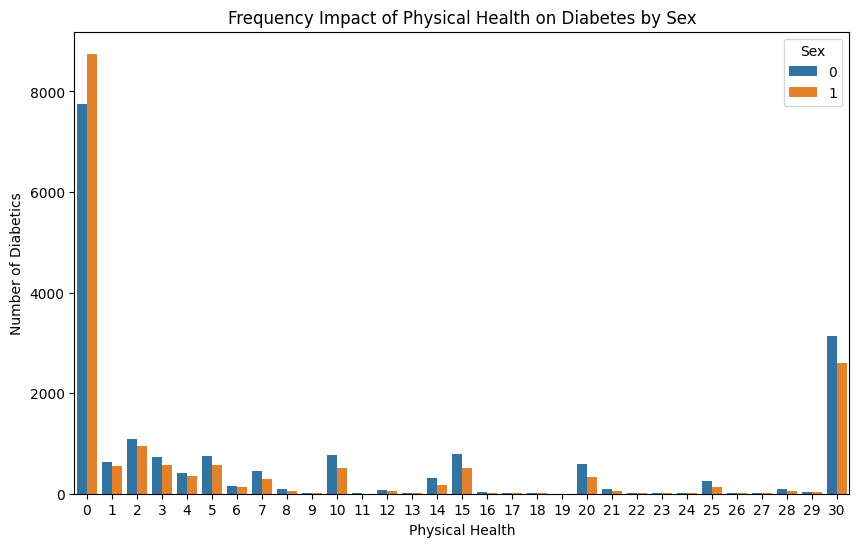

In [32]:
#the frequency impact of   physicalhlth  in diabetic for male and female

# physicalhlth :- which includes physical illness and injury, for how many days during the past 30
diabetic_by_sex_physhlth = data.groupby(['Sex', 'PhysHlth'])['Diabetes'].sum().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='PhysHlth', y='Diabetes', hue='Sex', data=diabetic_by_sex_physhlth)
plt.xlabel('Physical Health')
plt.ylabel('Number of Diabetics')
plt.title('Frequency Impact of Physical Health on Diabetes by Sex')
plt.show()


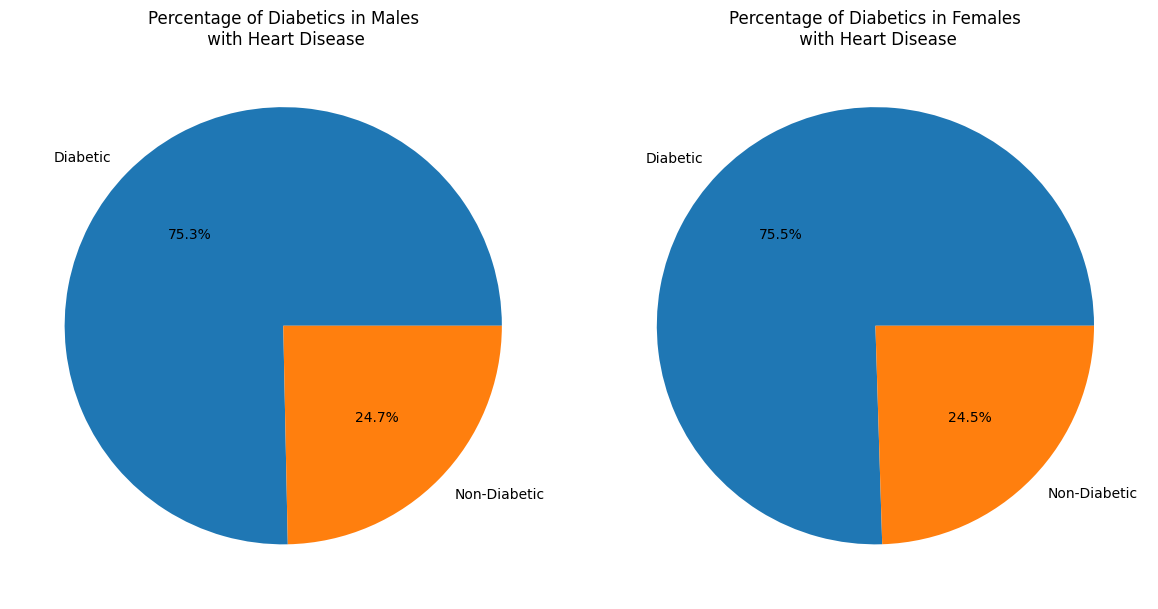

Percentage of diabetics in males with heart disease: 75.3%
Percentage of diabetics in males without heart disease: 48.0%
Percentage of diabetics in females with heart disease: 75.5%
Percentage of diabetics in females without heart disease: 45.3%


In [33]:
#the percent impact of   HeartDiseaseorAttack in diabetic for male and female

male_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 1)]
male_no_heart_disease = data[(data['Sex'] == 1) & (data['HeartDiseaseorAttack'] == 0)]
female_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 1)]
female_no_heart_disease = data[(data['Sex'] == 0) & (data['HeartDiseaseorAttack'] == 0)]

# Calculate percentages of diabetics for each group
male_hd_diabetic_percent = (male_heart_disease['Diabetes'].sum() / len(male_heart_disease)) * 100
male_nohd_diabetic_percent = (male_no_heart_disease['Diabetes'].sum() / len(male_no_heart_disease)) * 100
female_hd_diabetic_percent = (female_heart_disease['Diabetes'].sum() / len(female_heart_disease)) * 100
female_nohd_diabetic_percent = (female_no_heart_disease['Diabetes'].sum() / len(female_no_heart_disease)) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_hd_diabetic_percent, 100 - male_hd_diabetic_percent], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males\n with Heart Disease')

plt.subplot(1, 2, 2)
plt.pie([female_hd_diabetic_percent, 100 - female_hd_diabetic_percent], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females\n with Heart Disease')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with heart disease: {male_hd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in males without heart disease: {male_nohd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in females with heart disease: {female_hd_diabetic_percent:.1f}%")
print(f"Percentage of diabetics in females without heart disease: {female_nohd_diabetic_percent:.1f}%")


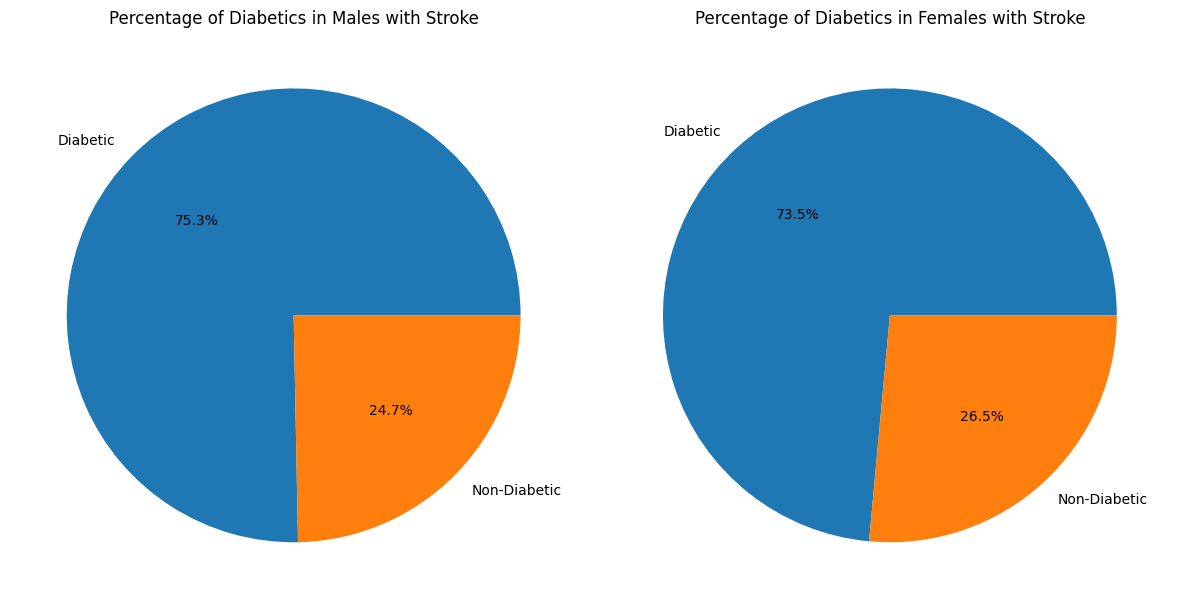

Percentage of diabetics in males with stroke: 75.3%
Percentage of diabetics in females with stroke: 73.5%


In [34]:
# the percent impact of Stroke  in diabetic for male and female
# Filter data for males and females with stroke
male_stroke = data[(data['Sex'] == 1) & (data['Stroke'] == 1)]
female_stroke = data[(data['Sex'] == 0) & (data['Stroke'] == 1)]

# Calculate percentage of diabetics for males with stroke
total_male_stroke = len(male_stroke)
diabetic_male_stroke = len(male_stroke[male_stroke['Diabetes'] == 1])
percent_diabetic_male_stroke = (diabetic_male_stroke / total_male_stroke) * 100

# Calculate percentage of diabetics for females with stroke
total_female_stroke = len(female_stroke)
diabetic_female_stroke = len(female_stroke[female_stroke['Diabetes'] == 1])
percent_diabetic_female_stroke = (diabetic_female_stroke / total_female_stroke) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([percent_diabetic_male_stroke, 100 - percent_diabetic_male_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with Stroke')

plt.subplot(1, 2, 2)
plt.pie([percent_diabetic_female_stroke, 100 - percent_diabetic_female_stroke],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with Stroke')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with stroke: {percent_diabetic_male_stroke:.1f}%")
print(f"Percentage of diabetics in females with stroke: {percent_diabetic_female_stroke:.1f}%")


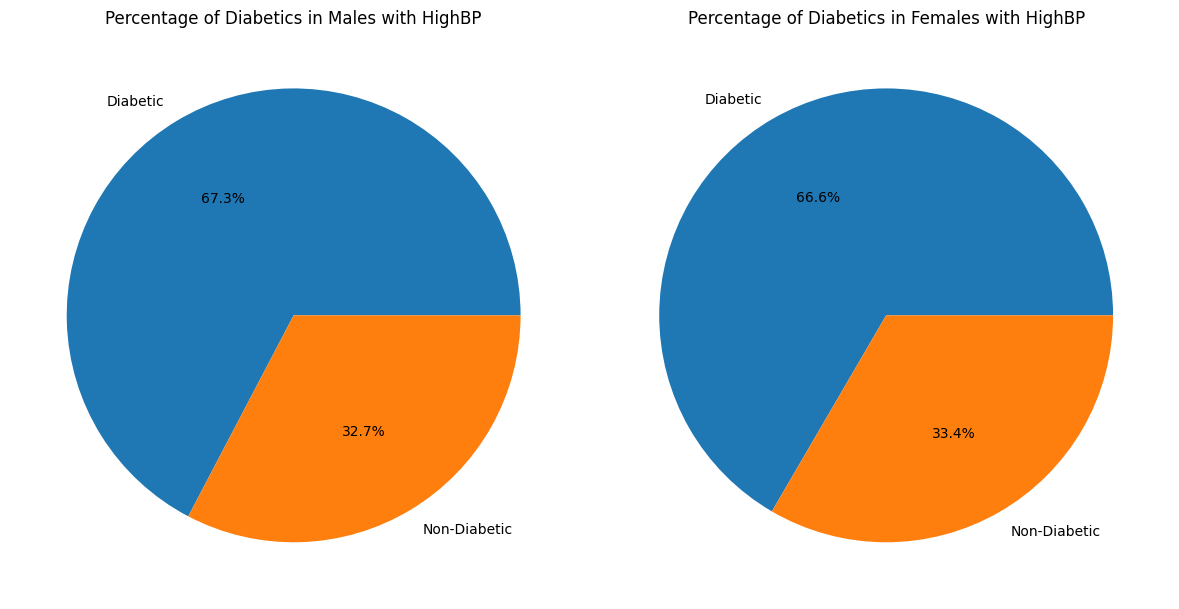

Percentage of diabetics in males with HighBP: 67.3%
Percentage of diabetics in females with HighBP: 66.6%


In [35]:
#the percent impact of HighBP  in  diabetic for male and female
male_highbp = data[(data['Sex'] == 1) & (data['HighBP'] == 1)]
female_highbp = data[(data['Sex'] == 0) & (data['HighBP'] == 1)]

# Calculate percentage of diabetics for males with HighBP
total_male_highbp = len(male_highbp)
diabetic_male_highbp = len(male_highbp[male_highbp['Diabetes'] == 1])
male_percent_diabetic = (diabetic_male_highbp / total_male_highbp) * 100

# Calculate percentage of diabetics for females with HighBP
total_female_highbp = len(female_highbp)
diabetic_female_highbp = len(female_highbp[female_highbp['Diabetes'] == 1])
female_percent_diabetic = (diabetic_female_highbp / total_female_highbp) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_percent_diabetic, 100 - male_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with HighBP')

plt.subplot(1, 2, 2)
plt.pie([female_percent_diabetic, 100 - female_percent_diabetic], labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with HighBP')

plt.tight_layout()
plt.show()

print(f"Percentage of diabetics in males with HighBP: {male_percent_diabetic:.1f}%")
print(f"Percentage of diabetics in females with HighBP: {female_percent_diabetic:.1f}%")


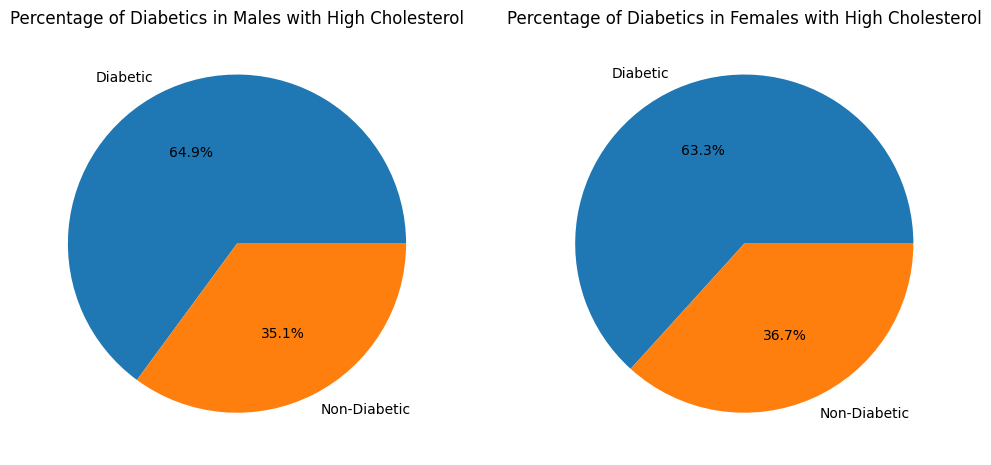

In [36]:
# Filter data for males and females with and without HighChol
male_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 1)]
male_no_highchol = data[(data['Sex'] == 1) & (data['HighChol'] == 0)]
female_highchol = data[(data['Sex'] == 0) & (data['HighChol'] == 1)]
female_no_highchol = data[(data['Sex'] == 0) & (data['HighChol'] == 0)]

# Calculate percentages of diabetics
male_highchol_diabetic_percent = (len(male_highchol[male_highchol['Diabetes'] == 1]) / len(male_highchol)) * 100
male_no_highchol_diabetic_percent = (len(male_no_highchol[male_no_highchol['Diabetes'] == 1]) / len(male_no_highchol)) * 100
female_highchol_diabetic_percent = (len(female_highchol[female_highchol['Diabetes'] == 1]) / len(female_highchol)) * 100
female_no_highchol_diabetic_percent = (len(female_no_highchol[female_no_highchol['Diabetes'] == 1]) / len(female_no_highchol)) * 100

# Create pie charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie([male_highchol_diabetic_percent, 100 - male_highchol_diabetic_percent],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Males with High Cholesterol')

plt.subplot(1, 2, 2)
plt.pie([female_highchol_diabetic_percent, 100 - female_highchol_diabetic_percent],
        labels=['Diabetic', 'Non-Diabetic'], autopct='%1.1f%%')
plt.title('Percentage of Diabetics in Females with High Cholesterol')

plt.show()

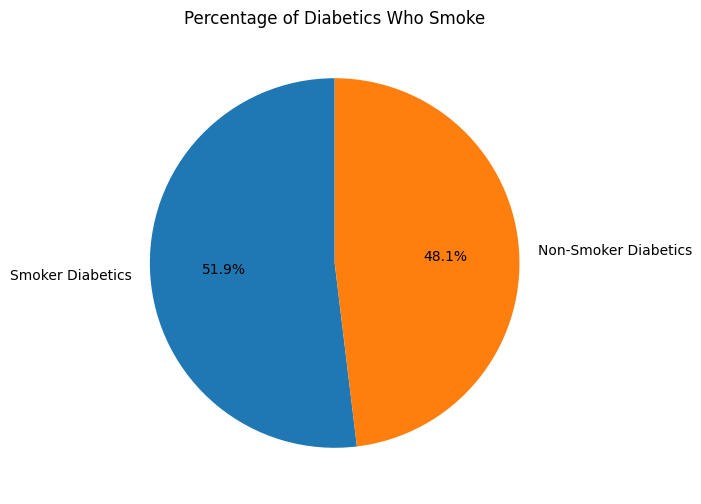

In [37]:
# the percent impact of smoke in diabetic
smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 1)].shape[0]
non_smoker_diabetics = data[(data['Diabetes'] == 1) & (data['Smoker'] == 0)].shape[0]

labels = ['Smoker Diabetics', 'Non-Smoker Diabetics']
sizes = [smoker_diabetics, non_smoker_diabetics]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Diabetics Who Smoke')
plt.show()


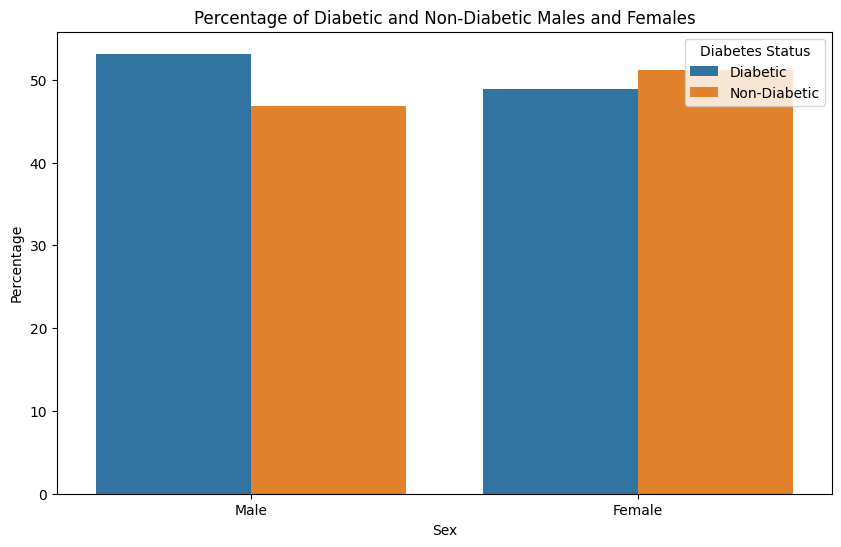

In [38]:
# Count diabetic and non-diabetic males and females
male_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 1)].shape[0]
male_non_diabetic = data[(data['Sex'] == 1) & (data['Diabetes'] == 0)].shape[0]
female_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 1)].shape[0]
female_non_diabetic = data[(data['Sex'] == 0) & (data['Diabetes'] == 0)].shape[0]

# Create a DataFrame for plotting
df = pd.DataFrame({
    'Sex': ['Male', 'Male', 'Female', 'Female'],
    'Diabetes Status': ['Diabetic', 'Non-Diabetic', 'Diabetic', 'Non-Diabetic'],
    'Count': [male_diabetic, male_non_diabetic, female_diabetic, female_non_diabetic]
})

# Calculate percentages
df['Percentage'] = df['Count'] / df.groupby('Sex')['Count'].transform('sum') * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex', y='Percentage', hue='Diabetes Status', data=df)
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetic and Non-Diabetic Males and Females')
plt.show()

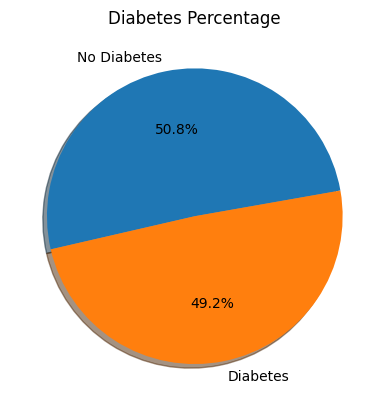

In [39]:
labels = ['No Diabetes', 'Diabetes']

fig, ax = plt.subplots()
ax.pie(data['Diabetes'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True, startangle=10)
ax.set_title('Diabetes Percentage')
plt.show()


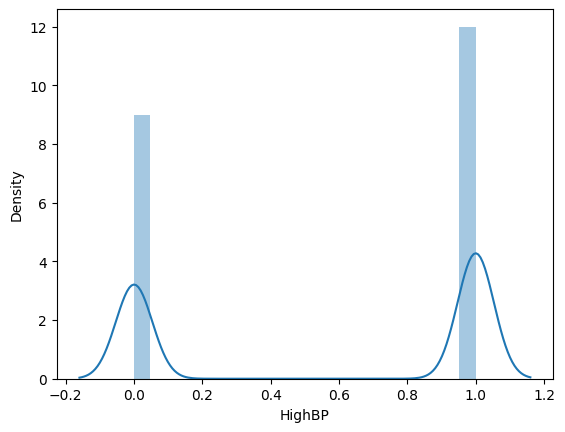

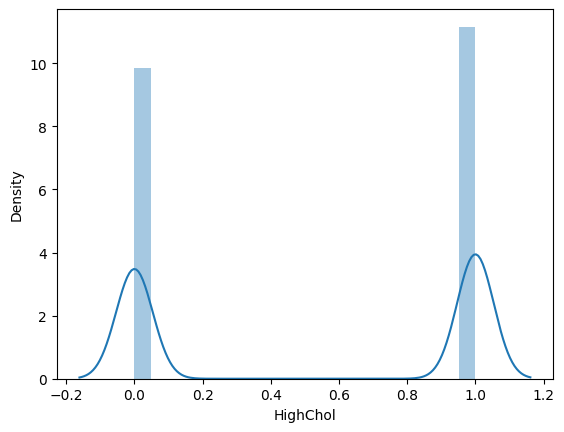

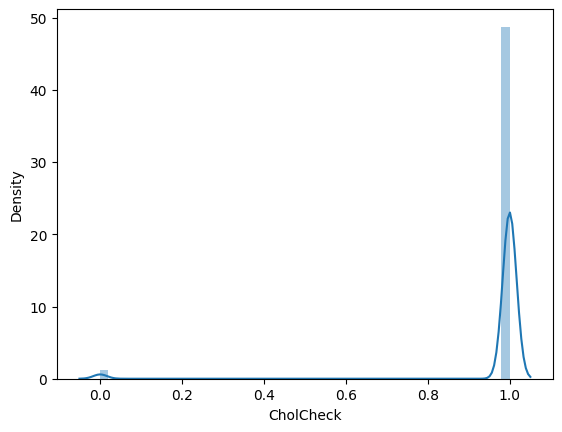

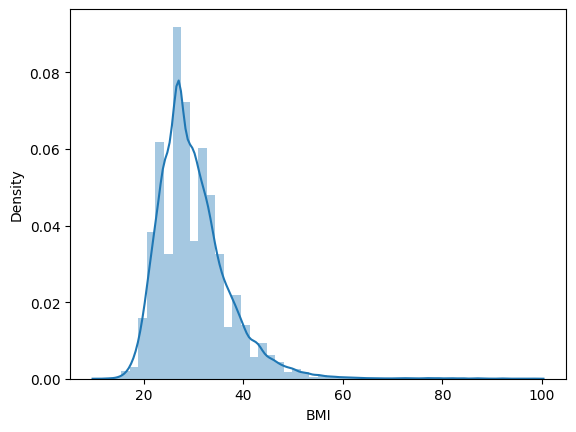

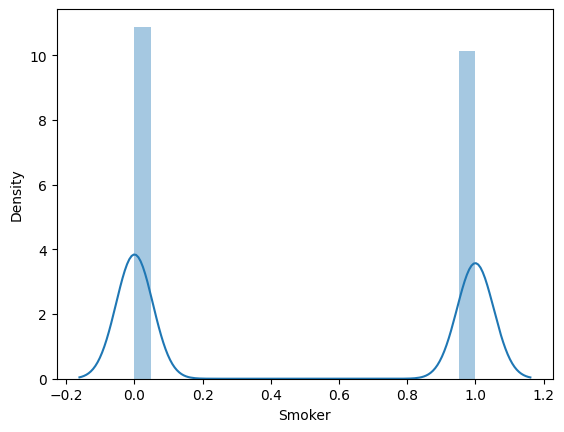

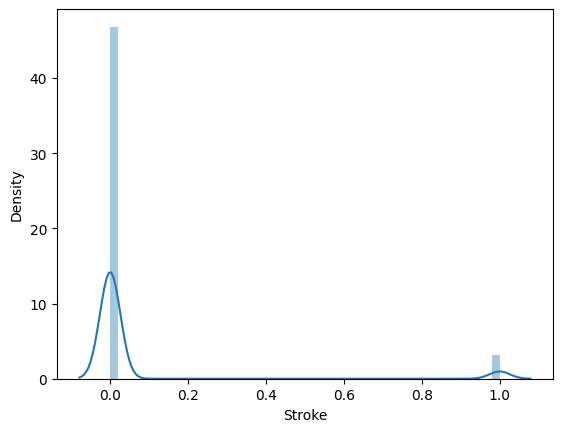

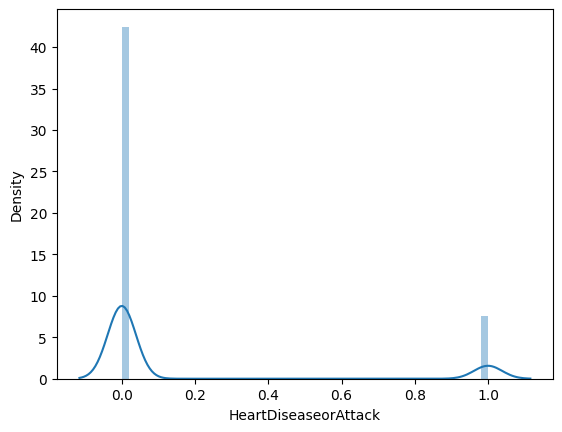

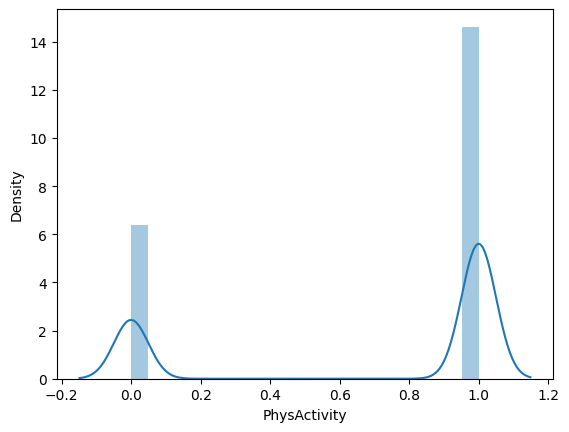

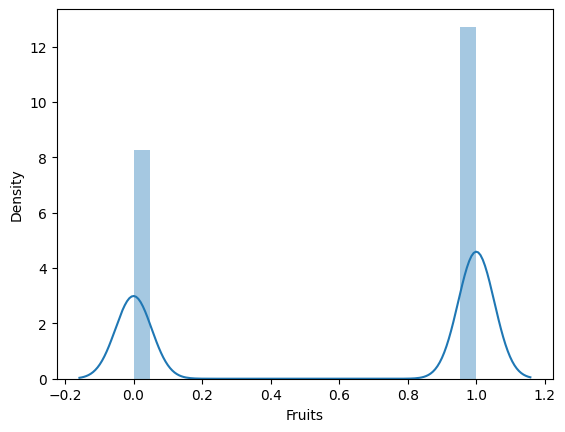

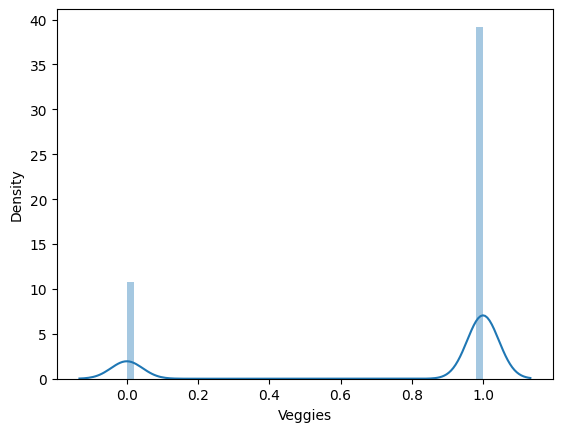

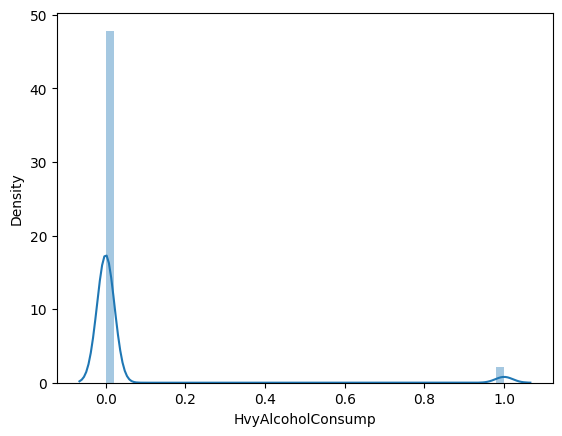

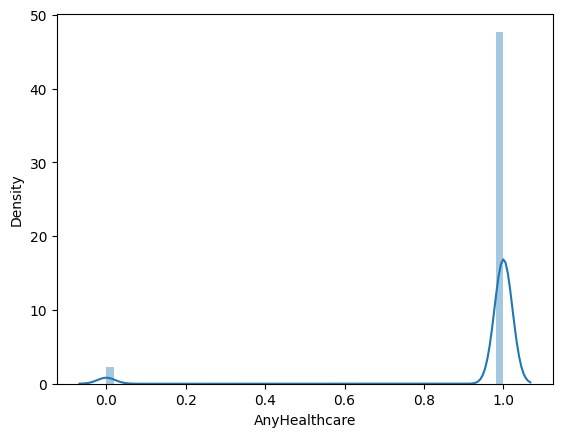

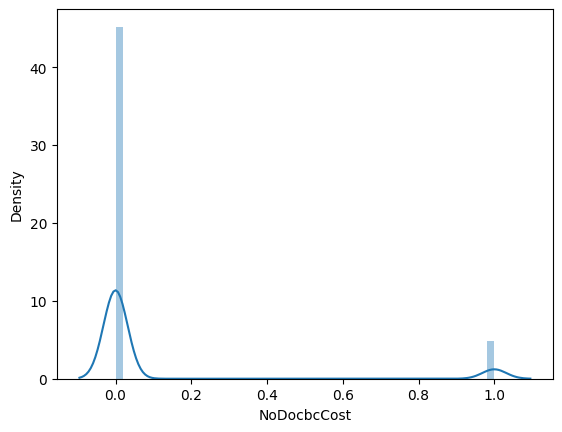

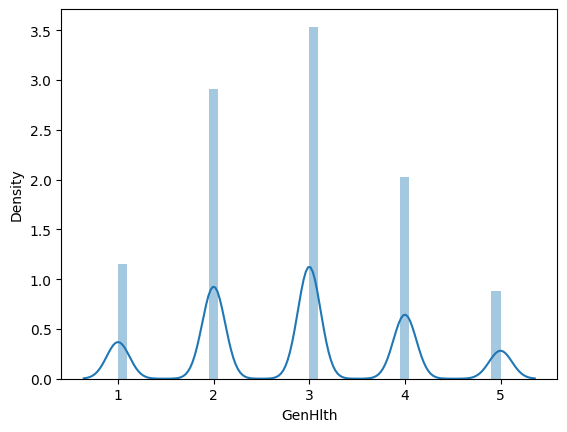

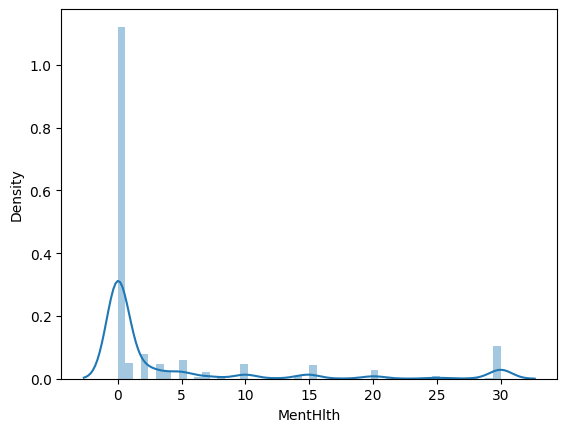

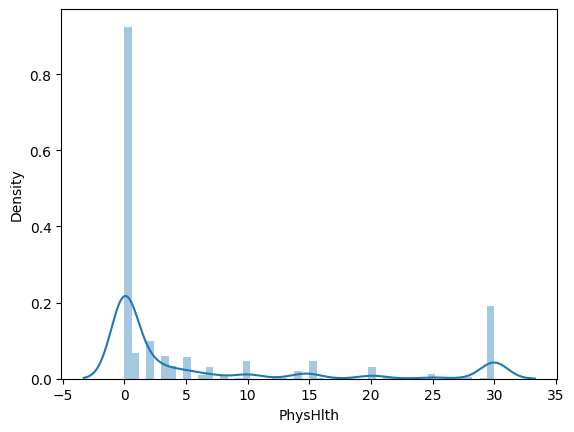

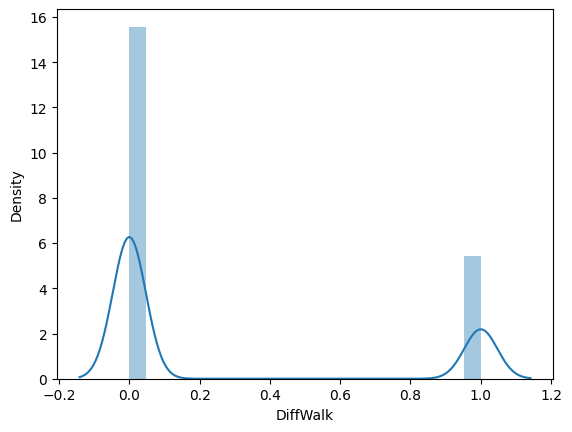

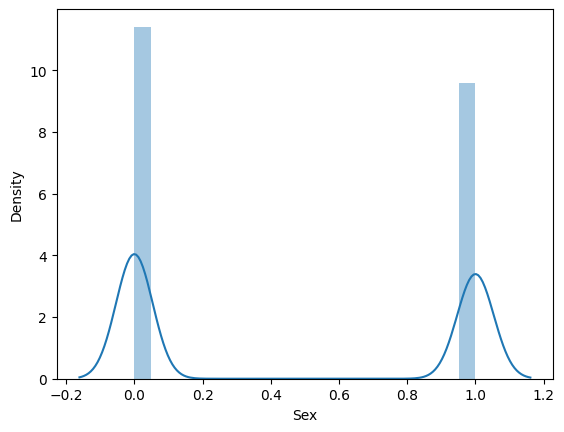

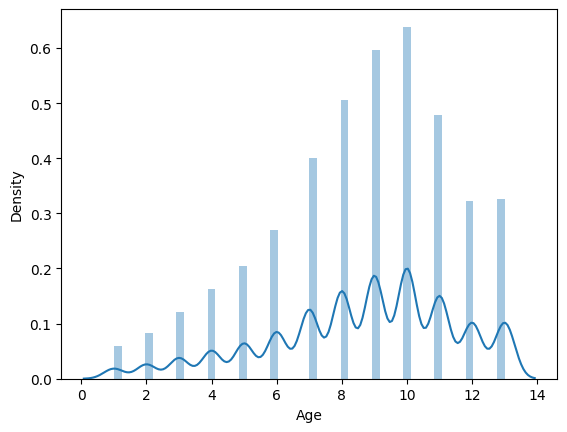

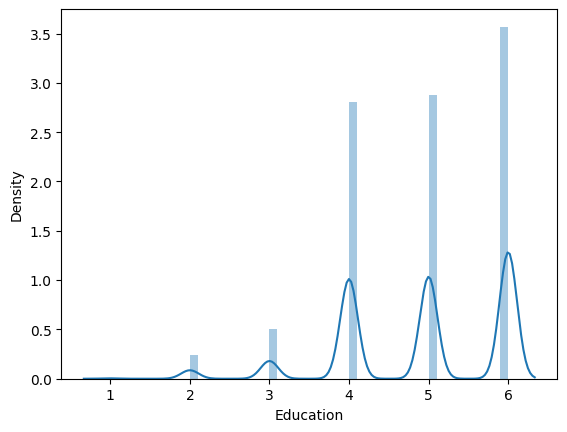

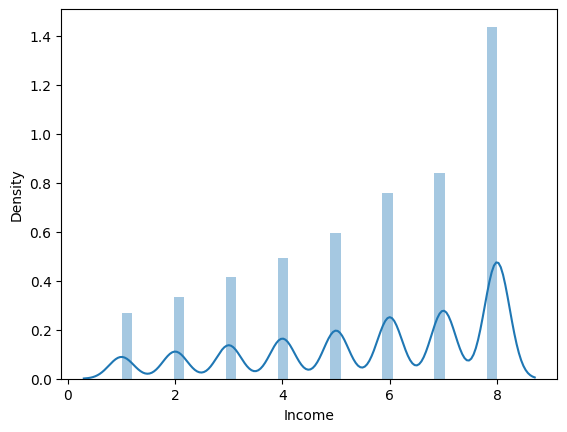

In [40]:
for col in data.columns[:-1]:
  sns.distplot(data[col])
  plt.show()

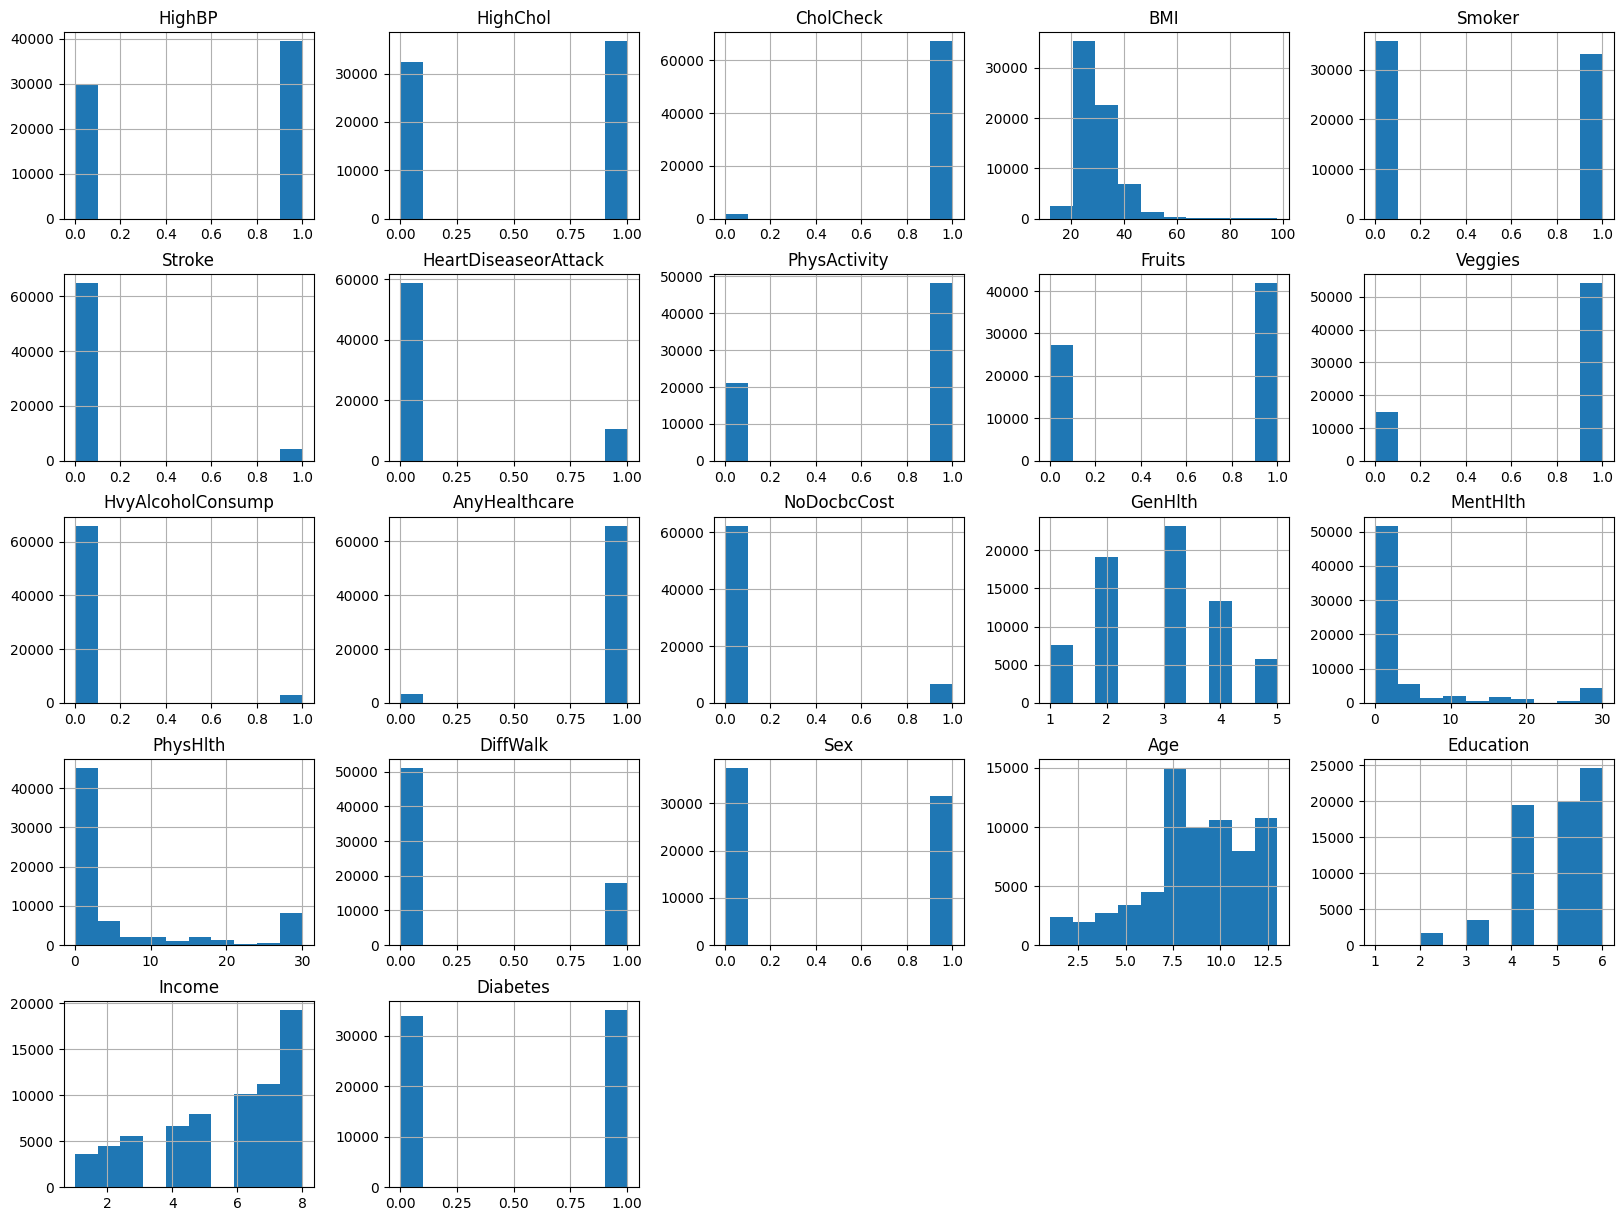

In [41]:
data.hist(figsize=(20,15))
plt.show()

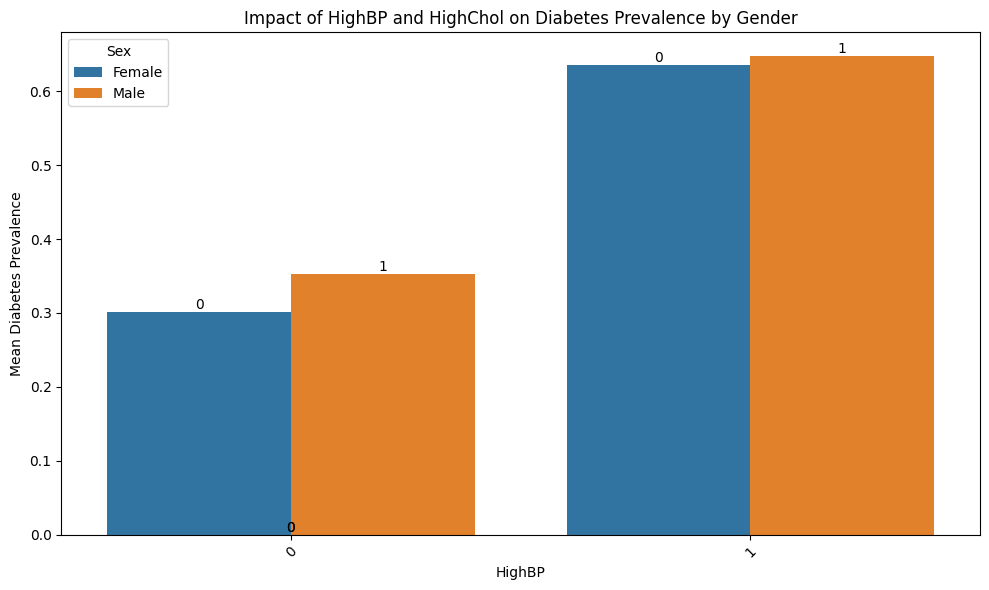

In [42]:
# prompt: show me if two features grouped how they will impact on diabetes for male and female

# Choose two features to analyze
feature1 = 'HighBP'  # Example feature 1
feature2 = 'HighChol'  # Example feature 2

# Group data by Sex, feature1, and feature2, then calculate mean Diabetes
grouped_data = data.groupby(['Sex', feature1, feature2])['Diabetes'].mean().reset_index()

# Map sex values to labels
grouped_data['Sex'] = grouped_data['Sex'].map({0: 'Female', 1: 'Male'})

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature1, y='Diabetes', hue='Sex', data=grouped_data, ci=None)
plt.xlabel(feature1)
plt.ylabel('Mean Diabetes Prevalence')
plt.title(f'Impact of {feature1} and {feature2} on Diabetes Prevalence by Gender')

# Add annotations for feature2 values
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    group_idx = i // len(grouped_data[feature1].unique())
    feature2_value = grouped_data[feature2].unique()[group_idx % len(grouped_data[feature2].unique())]
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(feature2_value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


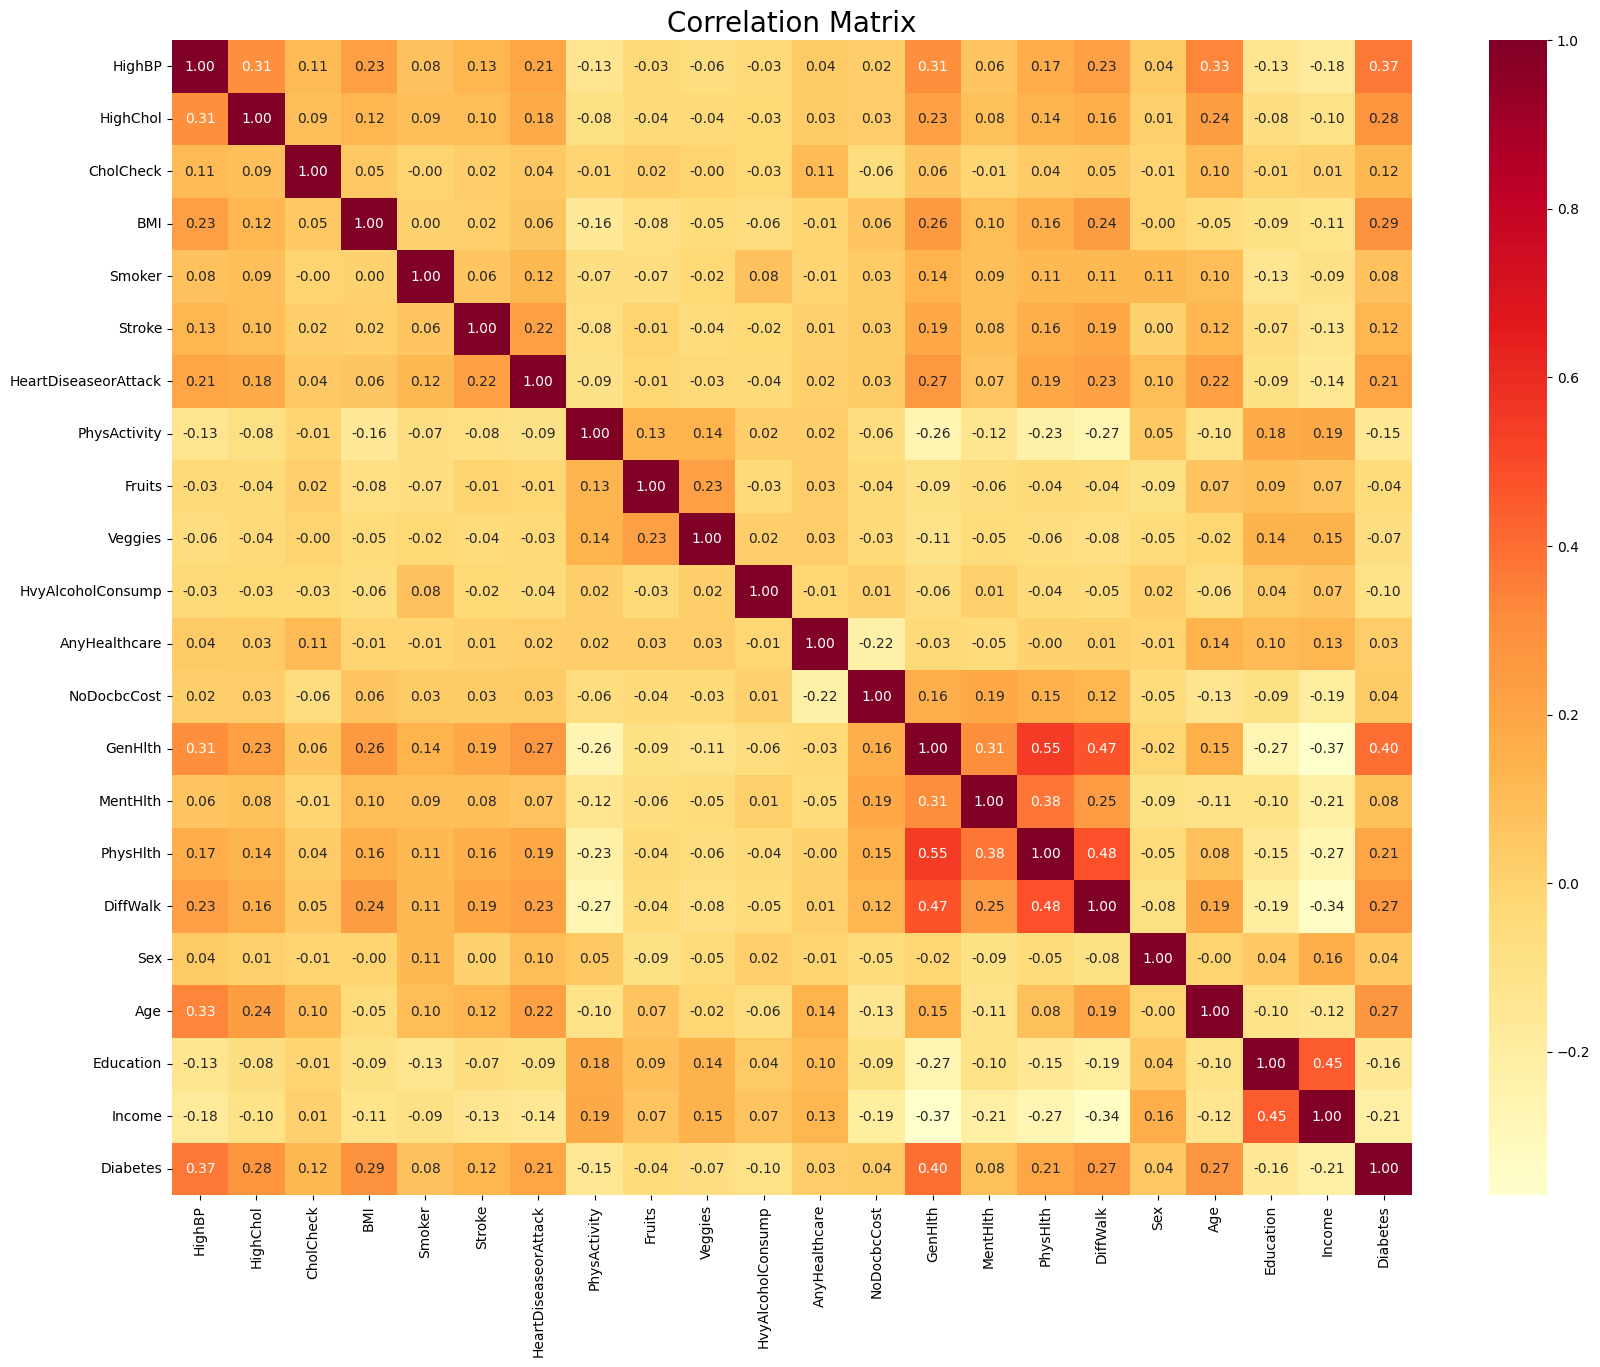

In [43]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(data.corr(), annot=True, fmt = '.2f', ax=ax, cmap='YlOrRd')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

**Splitting**

In [44]:
data1=data.drop(columns=['CholCheck','Fruits', 'Veggies','NoDocbcCost','MentHlth','CholCheck','Smoker'])
data1.head()

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes
0,1,0,26,0,0,1,0,1,3,30,0,1,4,6,8,0
1,1,1,26,1,0,0,0,1,3,0,0,1,12,6,8,0
2,0,0,26,0,0,1,0,1,1,10,0,1,13,6,8,0
3,1,1,28,0,0,1,0,1,3,3,0,1,11,6,8,0
4,0,0,29,0,0,1,0,1,2,0,0,0,8,5,8,0


In [45]:
from sklearn.model_selection import train_test_split
x= data1.drop('Diabetes', axis=1)
y = data1['Diabetes']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
rf_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, rf_pred)
print(cm)
print(classification_report(y_test, rf_pred))

[[4656 2067]
 [1727 5362]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      6723
           1       0.72      0.76      0.74      7089

    accuracy                           0.73     13812
   macro avg       0.73      0.72      0.72     13812
weighted avg       0.73      0.73      0.72     13812



Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [49]:
y_pred = lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[4820 1903]
 [1619 5470]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.73      6723
           1       0.74      0.77      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.74      0.74     13812
weighted avg       0.75      0.75      0.74     13812



knn

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [51]:
knn_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, knn_pred)
print(cm)
print(classification_report(y_test, knn_pred))

[[4648 2075]
 [1959 5130]]
              precision    recall  f1-score   support

           0       0.70      0.69      0.70      6723
           1       0.71      0.72      0.72      7089

    accuracy                           0.71     13812
   macro avg       0.71      0.71      0.71     13812
weighted avg       0.71      0.71      0.71     13812



xgboosting

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb_pred = xgb.predict(x_test)
cm = confusion_matrix(y_test, xgb_pred)
print(cm)
print(classification_report(y_test, xgb_pred))

[[4790 1933]
 [1477 5612]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      6723
           1       0.74      0.79      0.77      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812



In [ ]:
def predict_diabetes():
  # Get feature input from the user
  HighBP = int(input("Enter HighBP (0 or 1): "))
  HighChol = int(input("Enter HighChol (0 or 1): "))
  BMI = int(input("Enter BMI: "))
  Stroke = int(input("Enter Stroke (0 or 1): "))
  HeartDiseaseorAttack = int(input("Enter HeartDiseaseorAttack (0 or 1): "))
  PhysActivity = int(input("Enter PhysActivity (0 or 1): "))
  HvyAlcoholConsump = int(input("Enter HvyAlcoholConsump (0 or 1): "))
  AnyHealthcare = int(input("Enter AnyHealthcare (0 or 1): "))
  GenHlth = int(input("Enter GenHlth (1-5): "))
  PhysHlth = int(input("Enter PhysHlth (0-30): "))
  DiffWalk = int(input("Enter DiffWalk (0 or 1): "))
  Sex = int(input("Enter Sex (0 for Female, 1 for Male): "))
  Age = int(input("Enter Age (1-13): "))
  Education = int(input("Enter Education (1-6): "))
  Income = int(input("Enter Income (1-8): "))

  # Create a list of features
  features = [HighBP, HighChol, BMI, Stroke, HeartDiseaseorAttack, PhysActivity,
              HvyAlcoholConsump, AnyHealthcare, GenHlth, PhysHlth, DiffWalk,
              Sex, Age, Education, Income]

  # Convert features to a NumPy array and reshape for prediction
  features_array = np.array(features).reshape(1, -1)

  # Use the trained Random Forest model to make a prediction
  prediction = rf.predict(features_array)[0]

  # Return the prediction result as a string
  return 'Diabetic' if prediction == 1 else 'Non-Diabetic'

# Example usage:
prediction_result = predict_diabetes()
print(f"Prediction: {prediction_result}")


Enter HighBP (0 or 1): 1
Enter HighChol (0 or 1): 2
Enter BMI: 1
Enter Stroke (0 or 1): 1
Enter HeartDiseaseorAttack (0 or 1): 1
Enter PhysActivity (0 or 1): 1
Enter HvyAlcoholConsump (0 or 1): 1
Enter AnyHealthcare (0 or 1): 1
Enter GenHlth (1-5): 1
Enter PhysHlth (0-30): 2
Enter DiffWalk (0 or 1): 1
Enter Sex (0 for Female, 1 for Male): 1
Enter Age (1-13): 1
Enter Education (1-6): 1
Enter Income (1-8): 1
Prediction: Diabetic


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import gradio as gr
import joblib

# Load the trained Random Forest model


def predict_diabetes(HighBP, HighChol, BMI, Stroke, HeartDiseaseorAttack, PhysActivity,
                     HvyAlcoholConsump, AnyHealthcare, GenHlth, PhysHlth, DiffWalk,
                     Sex, Age, Education, Income):
    # Create a list of features
    features = [HighBP, HighChol, BMI, Stroke, HeartDiseaseorAttack, PhysActivity,
                HvyAlcoholConsump, AnyHealthcare, GenHlth, PhysHlth, DiffWalk,
                Sex, Age, Education, Income]

    # Convert features to a NumPy array and reshape for prediction
    features_array = np.array(features).reshape(1, -1)

    # Use the trained Random Forest model to make a prediction
    prediction = rf.predict(features_array)[0]

    # Return the prediction result as a string
    return 'Diabetic' if prediction == 1 else 'Non-Diabetic'

# Create Gradio interface
inputs = [
    gr.components.Radio([0, 1], label="HighBP"),
    gr.components.Radio([0, 1], label="HighChol"),
    gr.components.Number(label="BMI"),
    gr.components.Radio([0, 1], label="Stroke"),
    gr.components.Radio([0, 1], label="HeartDiseaseorAttack"),
    gr.components.Radio([0, 1], label="PhysActivity"),
    gr.components.Radio([0, 1], label="HvyAlcoholConsump"),
    gr.components.Radio([0, 1], label="AnyHealthcare"),
    gr.components.Slider(1, 5, step=1, label="GenHlth"),
    gr.components.Slider(0, 30, step=1, label="PhysHlth"),
    gr.components.Radio([0, 1], label="DiffWalk"),
    gr.components.Radio([0, 1], label="Sex (0 for Female, 1 for Male)"),
    gr.components.Slider(1, 13, step=1, label="Age"),
    gr.components.Slider(1, 6, step=1, label="Education"),
    gr.components.Slider(1, 8, step=1, label="Income")
]

output = gr.components.Label(label="Diabetes Prediction")

gr_interface = gr.Interface(fn=predict_diabetes, inputs=inputs, outputs=output)
gr_interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://792c6021f436531f69.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
